AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 5.0 		 0.26 		 0.32 |
| 5.0 		 0.28 		 0.2 |
| 5.0 		 0.44 		 0.21 |
| 5.0 		 0.44 		 0.19 |
| 5.0 		 0.25 		 0.28 |
| 5.0 		 0.6 		 0.18 |
| 5.0 		 0.26 		 0.5 |
| 5.0 		 0.29 		 0.32 |
| 5.0 		 0.32 		 0.15 |
| 5.0 		 0.77 		 0.31 |
| 5.0 		 0.27 		 0.45 |
| 5.0 		 0.22 		 0.28 |
| 5.0 		 0.47 		 0.3 |
| 5.0 		 0.73 		 0.58 |
| 5.0 		 0.45 		 0.32 |
| 5.0 		 0.71 		 0.17 |
| 5.0 		 0.23 		 0.15 |
| 5.0 		 0.21 		 0.28 |
| 5.0 		 0.22 		 0.18 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of D is: 0.19
The s.d. of R is: 0.19
-------------------------------------
The mean of M is: 5.0
The mean of D is: 0.34
The mean of R is: 0.39
-------------------------------------


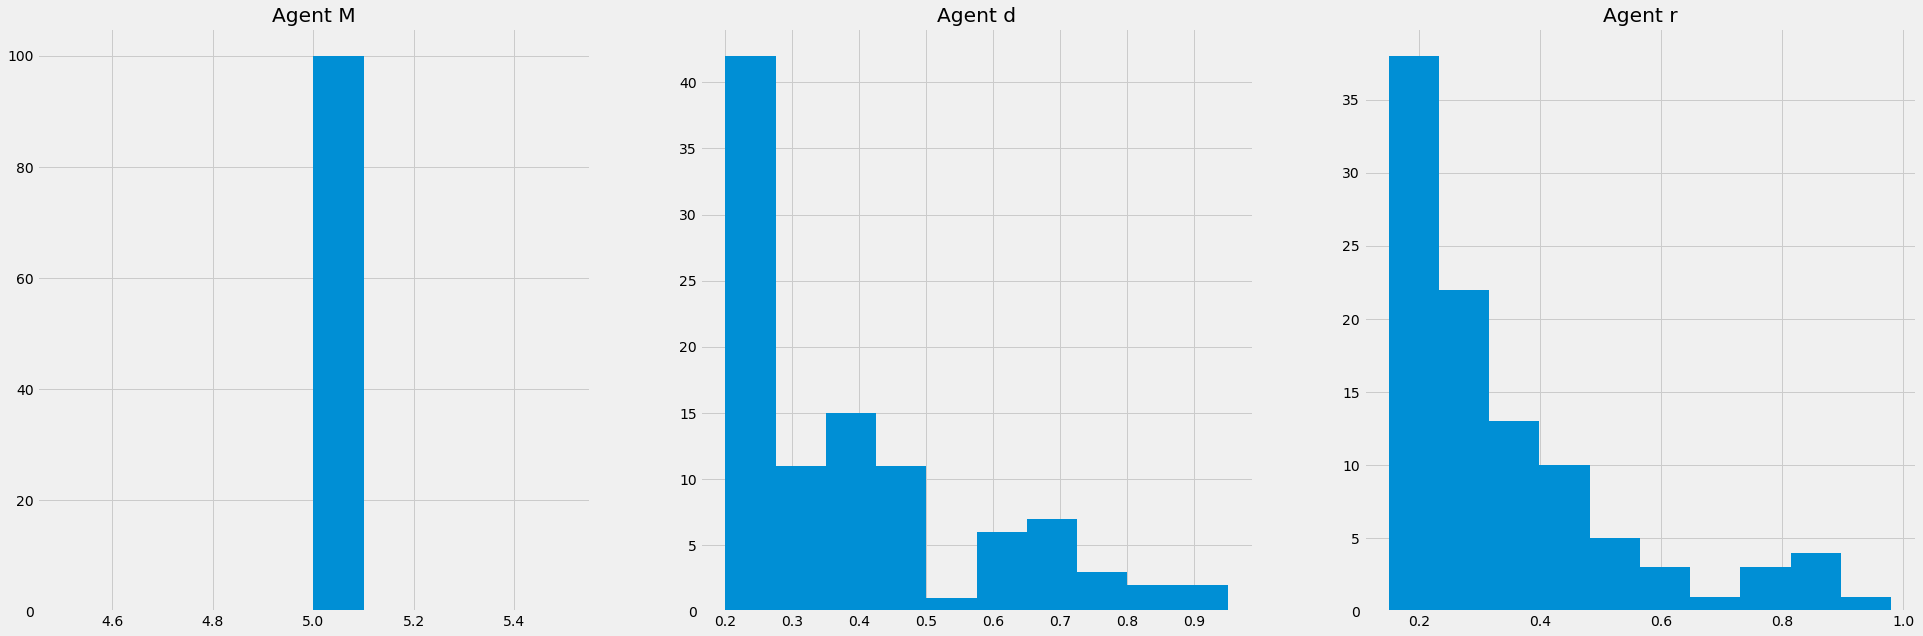

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 2.9, Temptation: 4.5, Sucker: 0, Punishment: 1.6
Agent 1 playing Agent 0: Reward: 2.4, Temptation: 3.4, Sucker: 0, Punishment: 1.0
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 2.9, Temptation: 4.5, Sucker: 0, Punishment: 1.6
Agent 2 playing Agent 0: Reward: 3.2, Temptation: 4.3, Sucker: 0, Punishment: 1.0
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 2.9, Temptation: 4.5, Sucker: 0, Punishment: 1.6
Agent 3 playing Agent 0: Reward: 3.2, Temptation: 4.1, Sucker: 0, Punishment: 1.0
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 2.9, Temptation: 4.5, Sucker: 0, Punishment: 1.6
Agent 4 playing Agent 

No handles with labels found to put in legend.


    S.D.  Counts
0    0.5     259
1    0.6     289
2    0.7     283
3    0.8     264
4    0.9     258
5    1.0     245
6    1.1     188
7    1.2     150
8    1.3     130
9    1.4     152
10   1.5     122
11   1.6      99
12   1.7      87
13   1.8      66
14   1.9      43
15   2.0      38
16   2.1      23
17   2.2      15
18   2.3      12
19   2.4       4
20   2.5       3
21   2.6       1
22   2.7       0
23   2.8       0
24   2.9       0
25   3.0       0


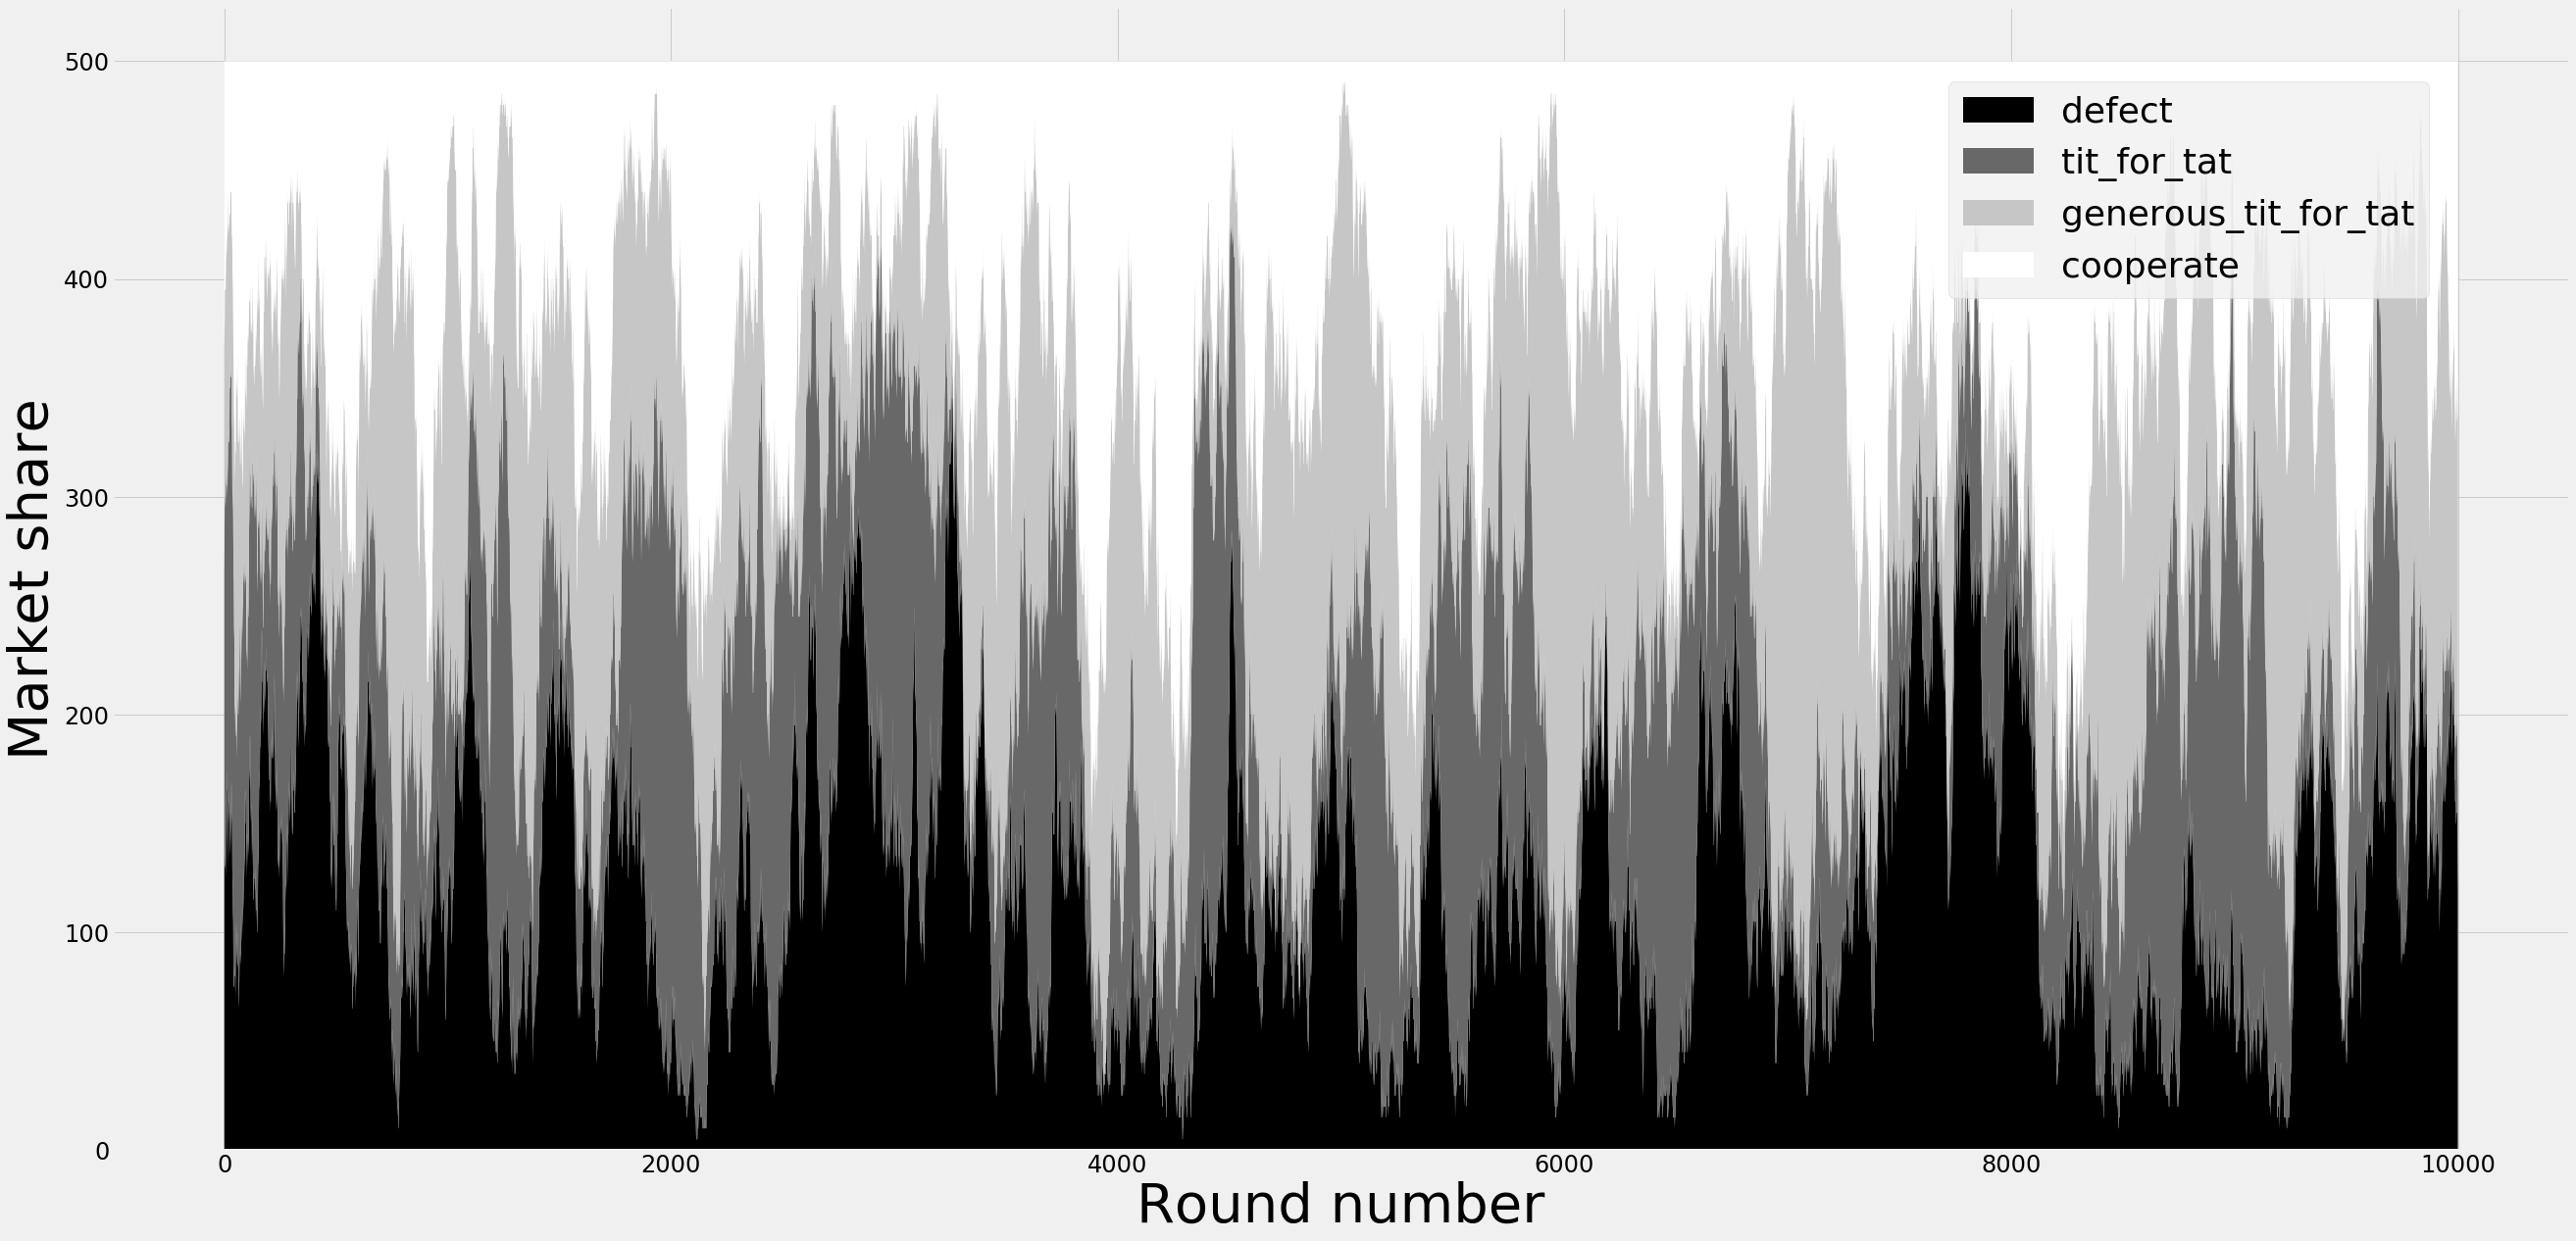

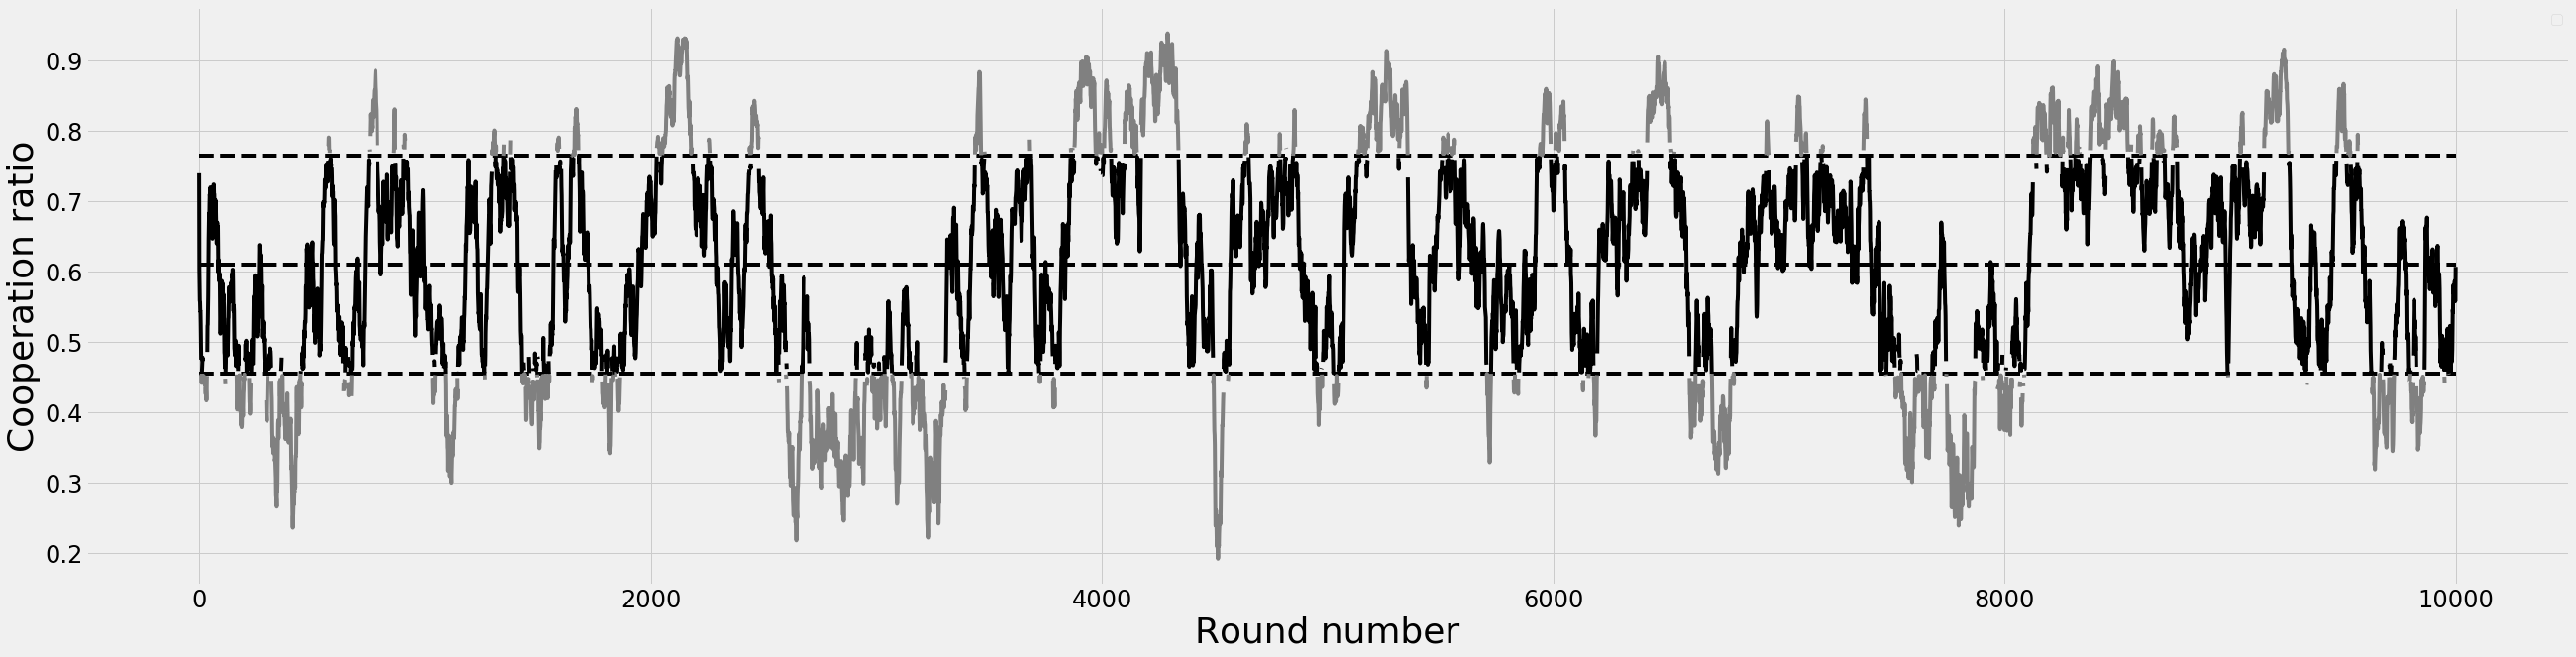

In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 512
np.random.seed(seed)

tour_type = "pareto_dr_min"
M = [5, 1/10000]
R = ['power', 0.15, 1]
D = ['power', 0.2, 1]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed))